#Stage 2 Analysis

In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
# initial dataset
INPUT_MAESTRO_DATA = "/content/drive/Shareddrives/CSE 291/Data/MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv"
variants = pd.read_csv(INPUT_MAESTRO_DATA, sep="\t", low_memory=False)
# data - only dropped - 22994 features
X_drop_path = "/content/drive/Shareddrives/CSE 291/Results/X_drop.csv"
X_drop = pd.read_csv(X_drop_path)
X_drop.rename(columns ={'Unnamed: 0' : 'Patient'}, inplace = True)
# data - only dropped + imputed - 22994 features
X_KNN_path = "/content/drive/Shareddrives/CSE 291/Results/X_KNN.csv"
X_KNN = pd.read_csv(X_KNN_path).drop('Unnamed: 0', axis = 1)
# data - only dropped + imputed + feature selected - 1199 features
data_path = "/content/drive/Shareddrives/CSE 291/Results/final_dataset.csv"
data = pd.read_csv(data_path)
#rename important data
x = data.drop(['Condition','Unnamed: 0'],axis=1)
y = data['Condition']
X_drop['Condition'] = y
cond = list(y.unique())
# peptide information
peptide_info_path = "/content/drive/Shareddrives/CSE 291/Results/variants_info.csv"
peptide_info = pd.read_csv(peptide_info_path).drop('Unnamed: 0', axis = 1)

In [ ]:
y.value_counts()

Non-severe-COVID-19         25
Symptomatic-non-COVID-19    25
Healthy                     22
Severe-COVID-19             18
Name: Condition, dtype: int64

## Assessment on important features for the classification

In [ ]:
#how many features to display
num_to_calc_fpr = 50
num_to_calc_lr = 50

num_to_disp_fpr = 50
num_to_disp_lr = 50

### Show a list of top features selected by your feature importance methods or from classification model(s)

#### Univariate Feature Importance

In [ ]:
#redo feature selection to find most significant features
from sklearn.feature_selection import SelectFpr, f_classif
#define selector and get scores from it
selector = SelectFpr(f_classif, alpha = 0.05)
x_fpr = selector.fit_transform(X_KNN,y)
#get scores and then normalize
scores = -np.log(selector.pvalues_)
scores /= scores.max()
#get associations of scores and features
feature_scores = sorted(zip(scores,list(X_KNN.columns)), reverse = True)
feature_scores = feature_scores[:num_to_calc_fpr]
fpr_scores, fpr_features = list(zip(*feature_scores))
fpr_features = list(fpr_features)

#### Feature Importance Using Logistic Regression

In [ ]:
#import logistic regression and relevant things
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectFromModel
# get the top features of the logistic regression using SelectFromModel
x_scaled = scale(x)
lr = LogisticRegression(random_state = 0, multi_class = 'multinomial', penalty = 'l2', solver = 'sag',max_iter = 1000).fit(x_scaled, y)
lr_sfm = SelectFromModel(estimator = lr, prefit = True, max_features = num_to_disp_lr)
lr_sfm_features = [i for indx, i in enumerate(x.columns) if lr_sfm.get_support()[indx] == True]
# get feature importance scores by getting the sum of magnitudes of coefficients
lr_feat_imp = np.sum(abs(lr.coef_), axis = 0)
lr_feat_scores = sorted(zip(lr_feat_imp,list(x.columns)), reverse = True)
lr_feat_scores = lr_feat_scores[:num_to_calc_lr]
lr_scores, lr_features = list(zip(*lr_feat_scores))
lr_features = list(lr_features)
# cross-check with results from SelectFromModel - verified by getting same 
# 30 using both methods

In [ ]:
#get intersection of important peptides from both methods

common_features = list(set(fpr_features)&set(lr_features))
commonTemp = []

for i in common_features: 
  avgIdx = (fpr_features.index(i) + lr_features.index(i))/2
  commonTemp.append((i, avgIdx))
commonTemp = sorted(commonTemp, key= lambda x: x[1])

common_features = [i[0] for i in commonTemp]
print(len(common_features), common_features)

# Get the Top N features
N = 10
print("TOP ", N, " FEATURES: ", common_features[:N])

13 ['K.[304.207](K,304.207)QTALVELV(K,522.33)H(K,304.207).P', 'K.[304.207]SLHTLFGD(K,332.213)L(C,57.021)TVA.T', 'R.{291.173}[304.207]ILGGHLDA(K,304.207).G', 'K.[304.207](C,57.021)(C,57.021)AAADPHE.C', 'K.[304.207](K,304.207)QTALVELV(K,520.821)H(K,304.207).P', 'R.{290.173}[304.207]EGT(C,57.021)PEAPTDE(C,57.021)(K,304.207)PV(K,304.207).W', 'K.[304.207](V,290.171)DNALQSGNSQESVTEQDS(K,304.207).D', 'K.[304.207](Y,116.074)LYETTLE(K,304.207).C', 'K.[304.207](P,238.418)(K,304.207)DTLMISR.T', 'K.[304.207](Q,291.175)N(C,57.021)ELFEQLGEY(K,304.207).F', 'K.[304.207]L(K,331.18)E(C,57.021)(C,57.021)E(K,304.207)PLLE(K,304.207).S', 'K.{311.984}[304.207]YI(C,57.021)ENQDSI.S', 'R.[304.207]HYEG(S,-18.005)TVPE(K,304.207)(K,304.207).T']


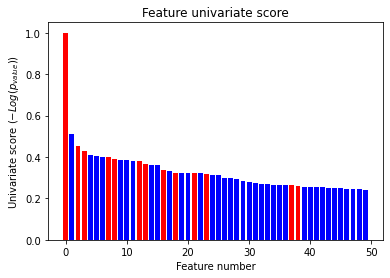

50 ['K.[304.207]SLHTLFGD(K,332.213)L(C,57.021)TVA.T', 'K.[304.207](S,144.078)LHTLFGD(K,304.207).L', 'R.{291.173}[304.207]ILGGHLDA(K,304.207).G', 'K.[304.207](K,304.207)QTALVELV(K,522.33)H(K,304.207).P', 'D.[304.207](K,203.075)SLHTLFGD(K,304.207).L', 'R.[304.207](Q,-48.618)(K,304.207)LHELQE(K,304.207).L', 'F.[304.207](K,291.14)DLGEENF(K,304.207).A', 'R.{290.173}[304.207]EGT(C,57.021)PEAPTDE(C,57.021)(K,304.207)PV(K,304.207).W', 'K.[304.207](P,238.418)(K,304.207)DTLMISR.T', 'R.[304.207]F(K,244.129)DLGEENF(K,304.207).A', 'K.[304.207](S,143.085)LHTLFGD(K,304.207).L', 'S.[304.207]IGYADSV(K,304.207).G', 'K.[304.207](Y,116.074)LYETTLE(K,304.207).C', 'K.[304.207](V,290.171)DNALQSGNSQESVTEQDS(K,304.207).D', 'K.[304.207]T(K,304.207)GTFAHR.D', 'R.[304.207]SYS(C,57.021)QVTH(E,11.673)GSTVE(K,304.207).T', 'K.[304.207]L(K,331.18)E(C,57.021)(C,57.021)E(K,304.207)PLLE(K,304.207).S', 'R.[304.207]ESLLN(H,57.028)FLYEVAR.R', 'K.[304.207](Q,291.175)N(C,57.021)ELFEQLGEY(K,304.207).F', 'K.[304.207](T,-13.036)

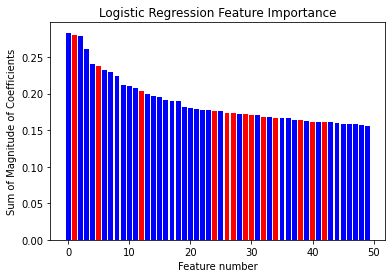

50 ['K.[304.207]AEFAEV(S,31.006)(K,304.207).L', 'K.[304.207](K,304.207)QTALVELV(K,520.821)H(K,304.207).P', 'C.[304.207]EVQLVES(G,42.052)GGLV(K,304.207)PGGSLR.L', 'K.[304.207](C,85.056)(C,57.021)TESLVNR.R', 'K.[304.207]QN(C,57.021)ELFEQ(L,30.007)GEY(K,304.207).F', 'K.[304.207](K,304.207)QTALVELV(K,522.33)H(K,304.207).P', 'K.[304.207]YAATSQVLL(P,336.082)S(K,304.207).D', 'V.[304.207](E,-61.082)EYAN(C,57.021)HLAR.A', 'R.[304.207]HNVYINGITYT(P,100.028)VSSTNE(K,304.207).D', 'K.[304.207](K,628.32)QTALVELV(K,304.207).H', 'K.[304.207]LVD(K,304.207)FLED(V,272.169)(K,304.207).K', 'K.[304.207]RGPGGAWAAEV(I,290.196)TDAR.E', 'K.[304.207](C,57.021)(C,57.021)AAADPHE.C', 'K.[304.207]AEFAEV(S,-10.635)(K,304.207).L', '-.[304.207]DIQ(M,68.912)TQSPSSLSASVGDR.V', 'K.[304.207]N(K,304.207)YEDEIN(K,304.207)R.T', 'R.[304.207]TLLETLQ(K,304.207).A', 'K.[304.207]AEF(A,28.036)EVS(K,304.207).L', 'D.[304.207](M,-56.112)AEIE(K,304.207)FD(K,304.207).S', 'K.[304.207]VLGAF(S,304.213)DGLAHLDNL(K,304.207).G', 'K.[304.207]L

In [ ]:
#plot bar plots of the feature importance score for both methods
#peptide variants common to both methods have a different color than those only in one method
color_dict = {0: 'red', 1: 'blue'}
fpr_color_list = []
for i in fpr_features[:num_to_disp_fpr]:
  if i in common_features:
    fpr_color_list.append(color_dict[0])
  else:
    fpr_color_list.append(color_dict[1])

lr_color_list = []
for i in lr_features[:num_to_disp_lr]:
  if i in common_features:
    lr_color_list.append(color_dict[0])
  else:
    lr_color_list.append(color_dict[1])

plt.figure()
plt.title("Feature univariate score")
plt.bar(range(0,num_to_disp_fpr),fpr_scores[:num_to_disp_fpr],color=fpr_color_list)
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()
print(len(fpr_features), fpr_features)
plt.figure()
plt.title("Logistic Regression Feature Importance")
plt.bar(range(0,num_to_disp_lr),lr_scores[:num_to_disp_lr],color=lr_color_list)
plt.xlabel("Feature number")
plt.ylabel("Sum of Magnitude of Coefficients")
plt.show()
print(len(lr_features), lr_features)

### Evaluate how well each important feature (or groups of features) correlate to the classes

I not sure what to do for this part. Maybe the next section will be enough to cover both parts 

### Show supporting evidence supporting your evaluation of the quality of the selected important features

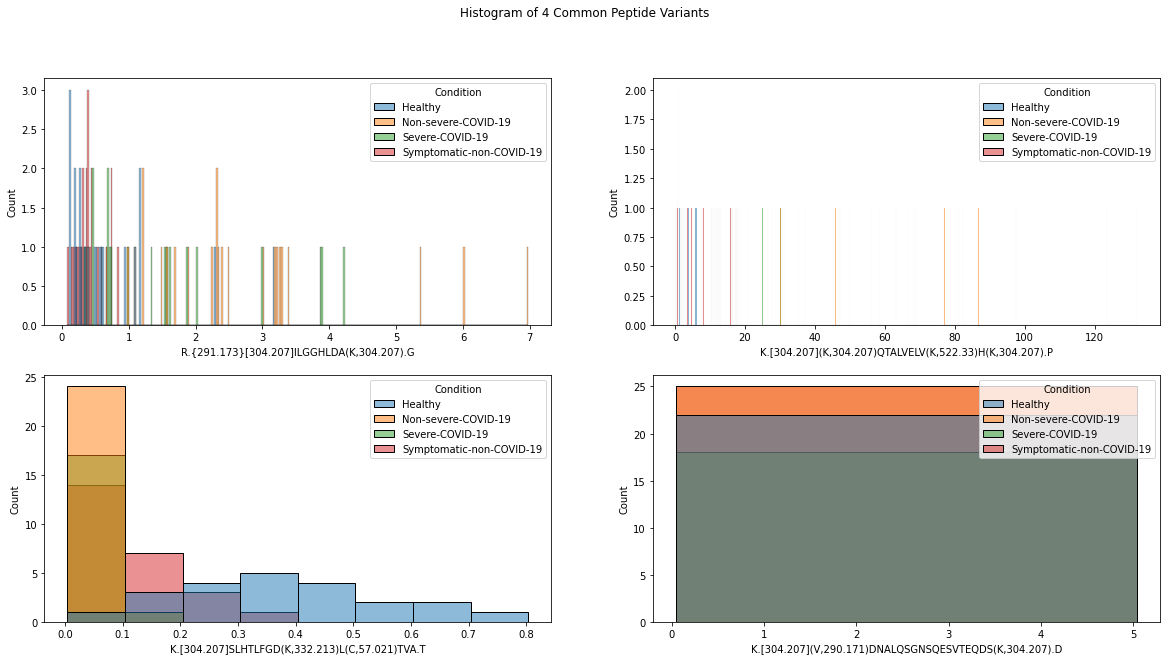

In [ ]:
# histogram of the 4 common features
fig, axes = plt.subplots(2,2, figsize = (20,10))
fig.suptitle('Histogram of 4 Common Peptide Variants')
sns.histplot(X_drop, x = common_features[0], hue='Condition', binwidth = 0.025, ax = axes[0,0])
sns.histplot(X_drop, x = common_features[1], hue='Condition', binwidth = 0.05, ax = axes[0,1])
sns.histplot(X_drop, x = common_features[2], hue='Condition', binwidth = 0.1, ax = axes[1,0])
sns.histplot(X_drop, x = common_features[3], hue='Condition', binwidth = 5, ax = axes[1,1])

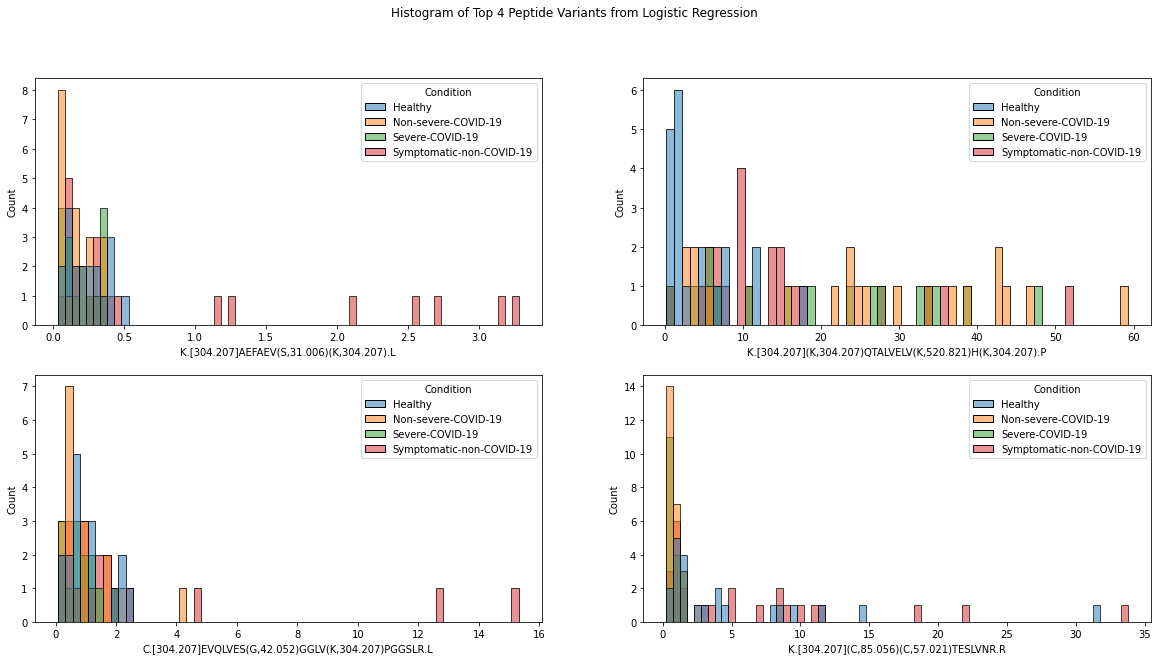

In [ ]:
# histogram of the 4 features from logistic regression
fig, axes = plt.subplots(2,2, figsize = (20,10))
fig.suptitle('Histogram of Top 4 Peptide Variants from Logistic Regression')
sns.histplot(X_drop, x = lr_features[0], hue='Condition', binwidth = 0.05, ax = axes[0,0])
sns.histplot(X_drop, x = lr_features[1], hue='Condition', binwidth = 1, ax = axes[0,1])
sns.histplot(X_drop, x = lr_features[2], hue='Condition', binwidth = 0.25, ax = axes[1,0])
sns.histplot(X_drop, x = lr_features[3], hue='Condition', binwidth = 0.5, ax = axes[1,1])

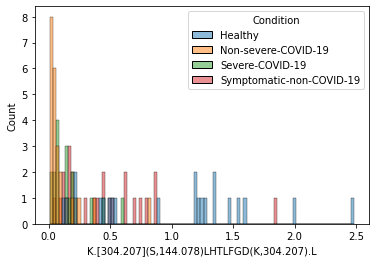

In [ ]:
# histogram of the one top peptide variant in FPR that was not in common
sns.histplot(X_drop, x = fpr_features[1], hue='Condition', binwidth = 0.025)

In [ ]:
def z_score(df,max_score):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        df_std[column] = df_std[column].map(lambda x: x if np.isnan(x) else min(max_score,max(-max_score,x)))
    return df_std

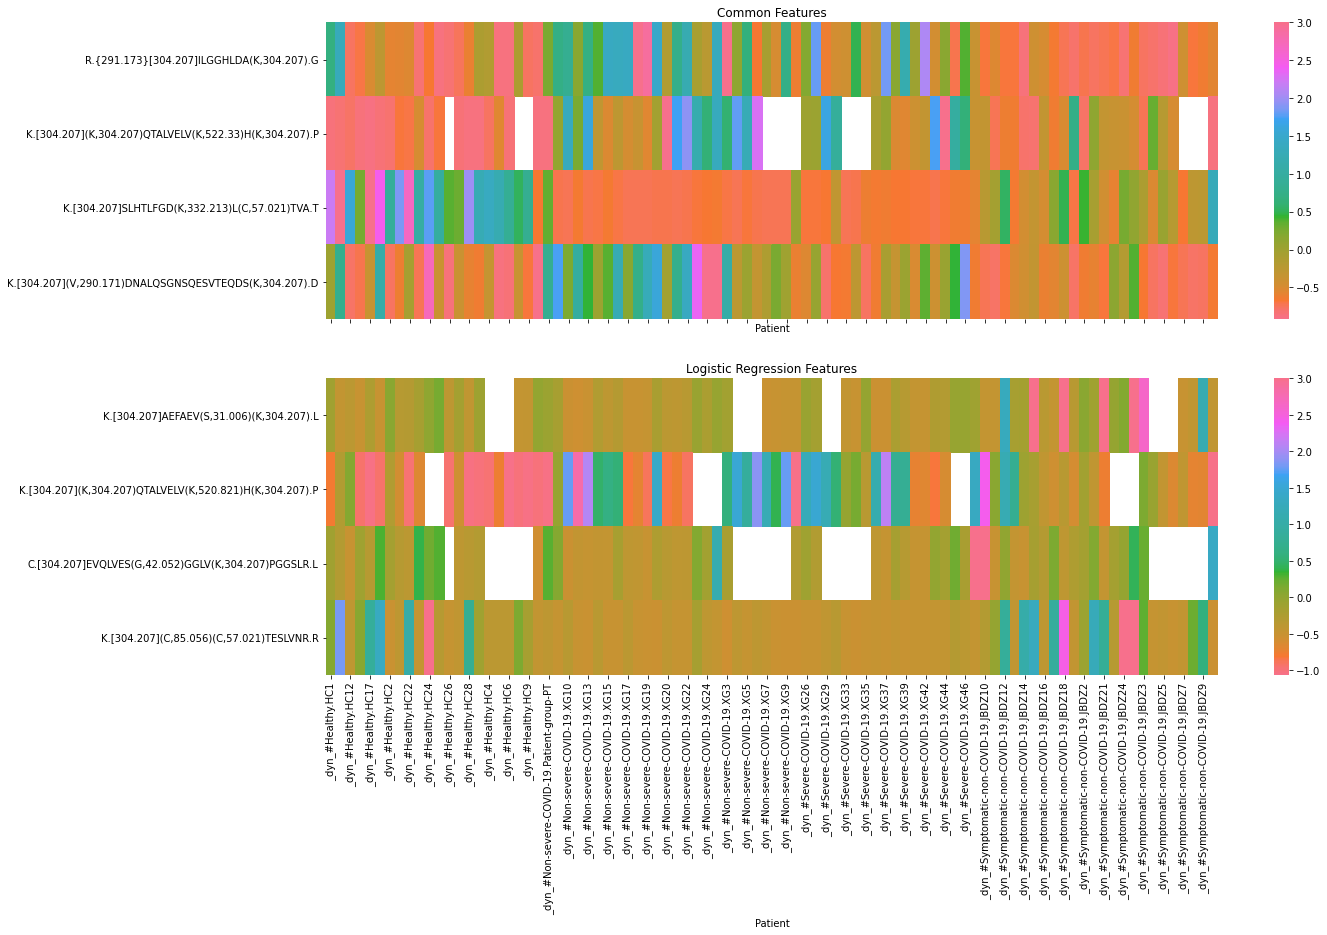

In [ ]:
# heatmap of common features
X_drop_copy = X_drop.copy()
X_drop_copy.set_index('Patient',inplace=True)
X_drop_common_hm = X_drop_copy.loc[:,list(common_features)]
X_drop_common_hm = z_score(X_drop_common_hm,3)
X_drop_common_hm = X_drop_common_hm.T
X_drop_lr = lr_features[:4]
X_drop_lr_hm = X_drop_copy.loc[:,list(X_drop_lr)]
X_drop_lr_hm = z_score(X_drop_lr_hm,3)
X_drop_lr_hm = X_drop_lr_hm.T

cmap = sns.color_palette("husl", as_cmap=True)
f, (ax1,ax2) = plt.subplots(2,figsize=(20,12),sharex = True)
ax1.set_title('Common Features')
hm1 = sns.heatmap(X_drop_common_hm,cmap=cmap,ax=ax1)
ax2.set_title('Logistic Regression Features')
hm2 = sns.heatmap(X_drop_lr_hm,cmap=cmap,ax=ax2)

## Assessment on protein identification

### Show the relation between the peptides in the peptide identification assessment step and their associated proteins (e.g. by a bipartite graph or a peptide-protein table)

In [ ]:
# select relevant rows in peptide information
# we use all features identified in both methods but can change that
# could use common features but then the bipartite map would be very simple
fpr_features.extend(lr_features)
bg_features = list(set(fpr_features))
selected_peptides = peptide_info[peptide_info['Peptide'].isin(bg_features)]
top_proteins = selected_peptides[['Unmodified_sequence','Top_canonical_protein']].copy()

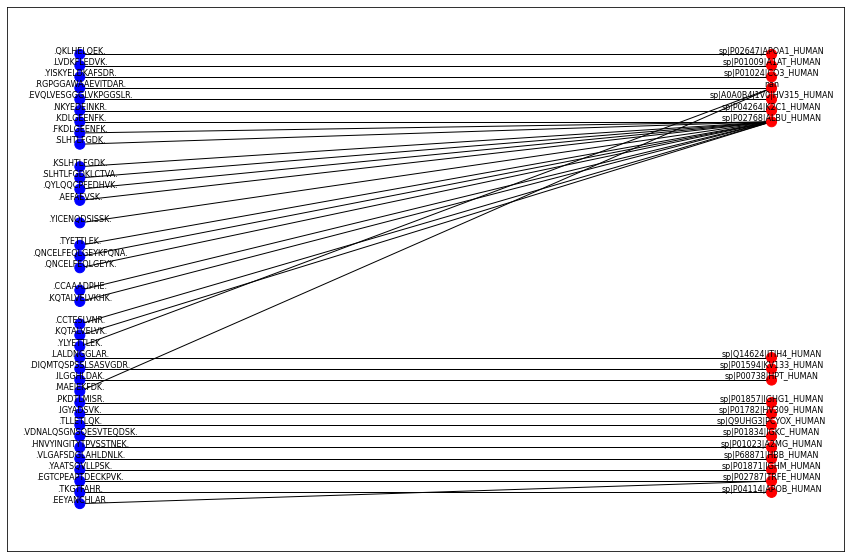

True


In [ ]:
# create bipartite graph to show top proteins
import networkx as nx
from networkx.algorithms import bipartite

G = nx.Graph()
G.add_nodes_from(top_proteins['Unmodified_sequence'], bipartite = 0)
G.add_nodes_from(top_proteins['Top_canonical_protein'], bipartite = 1)
G.add_edges_from((row['Unmodified_sequence'],row['Top_canonical_protein']) for idx, row in top_proteins.iterrows())
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]
pos = {node:[0, i] for i,node in enumerate(top_proteins['Unmodified_sequence'])}
pos.update({node:[1, i] for i,node in enumerate(top_proteins['Top_canonical_protein'])})
plt.figure(figsize=(15,10))
nx.draw_networkx(G, pos, with_labels=False, node_color=color_list, node_size = 100)
for p in pos:  # raise text positions
    pos[p][1] += 0.3
nx.draw_networkx_labels(G, pos, font_size = 8)
plt.show()
print(nx.is_bipartite(G))

### Give evidence to confirm the protein identification (e.g. whether the peptides are uniquely mapped to the proteins, whether other peptides of the same proteins are also identified)

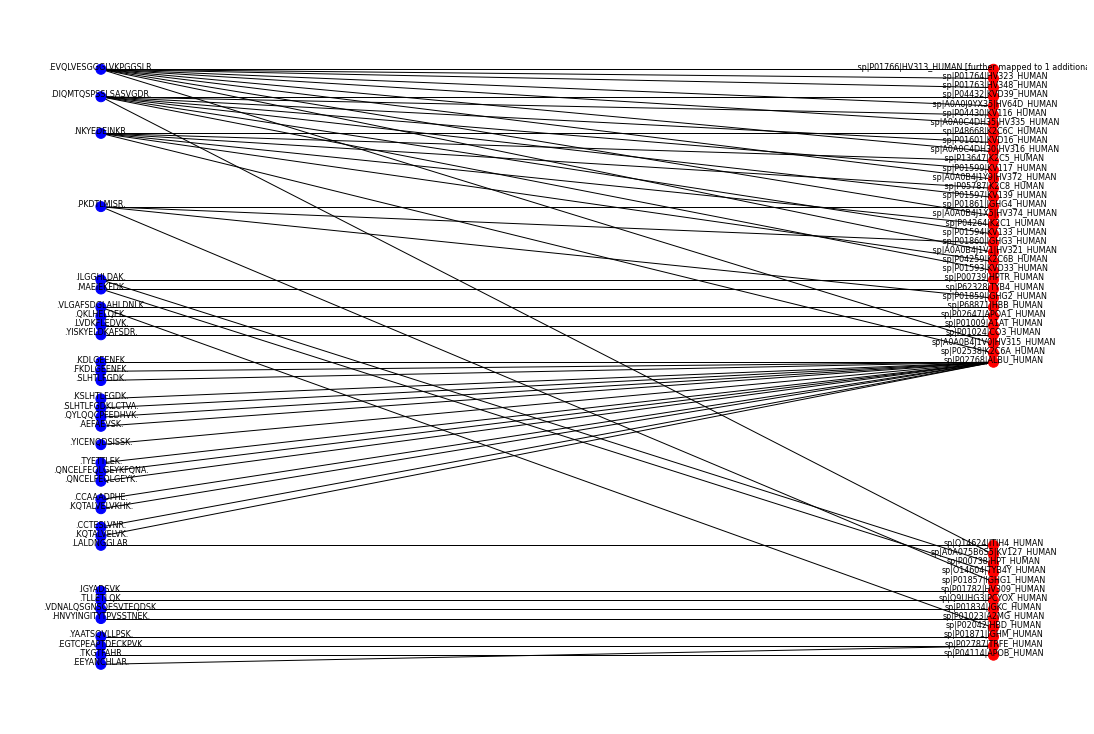

True


In [ ]:
proteins = selected_peptides[['Unmodified_sequence','Canonical_proteins']].copy()
proteins[['protein_1','protein_2','protein_3','protein_4','protein_5','protein_6','protein_7','protein_8','protein_9','protein_10']] = proteins['Canonical_proteins'].str.split(';',expand=True)
proteins = proteins.drop('Canonical_proteins', axis = 1)
proteins = pd.melt(proteins, id_vars = 'Unmodified_sequence')
proteins = proteins.dropna()

G = nx.Graph()
G.add_nodes_from(proteins['Unmodified_sequence'], bipartite = 0)
G.add_nodes_from(proteins['value'], bipartite = 1)
G.add_edges_from((row['Unmodified_sequence'],row['value']) for idx, row in proteins.iterrows())
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]
pos = {node:[0, i] for i,node in enumerate(proteins['Unmodified_sequence'])}
pos.update({node:[1, i] for i,node in enumerate(proteins['value'])})
plt.figure(figsize=(15,10))
nx.draw(G, pos, with_labels=False, node_color=color_list, node_size = 100)
for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(G, pos, font_size = 8)
plt.show()
print(nx.is_bipartite(G))

## Assessment on peptide/variant-level differential abundance

we do this on the common features

In [ ]:
# perform a wilcoxon test (nonparametric)
from scipy import stats
# how many features to evaluate
ttest = np.zeros((len(common_features),len(cond),len(cond)))
mwtest = np.zeros((len(common_features),len(cond),len(cond)))
for i in range(0,len(common_features)):
  print("Feature " + str(i) + ": " + common_features[i])
  for j in range(0,len(cond)):
    for k in range(0,len(cond)):
      j_inten = X_drop[common_features[i]][X_drop.Condition == cond[j]].dropna()
      k_inten = X_drop[common_features[i]][X_drop.Condition == cond[k]].dropna()
      ttest[i,j,k] = stats.ttest_ind(j_inten,k_inten, equal_var = False).pvalue
      mwtest[i,j,k] = stats.mannwhitneyu(j_inten,k_inten,alternative = 'two-sided').pvalue

Feature 0: R.{291.173}[304.207]ILGGHLDA(K,304.207).G
Feature 1: K.[304.207](K,304.207)QTALVELV(K,522.33)H(K,304.207).P
Feature 2: K.[304.207]SLHTLFGD(K,332.213)L(C,57.021)TVA.T
Feature 3: K.[304.207](V,290.171)DNALQSGNSQESVTEQDS(K,304.207).D


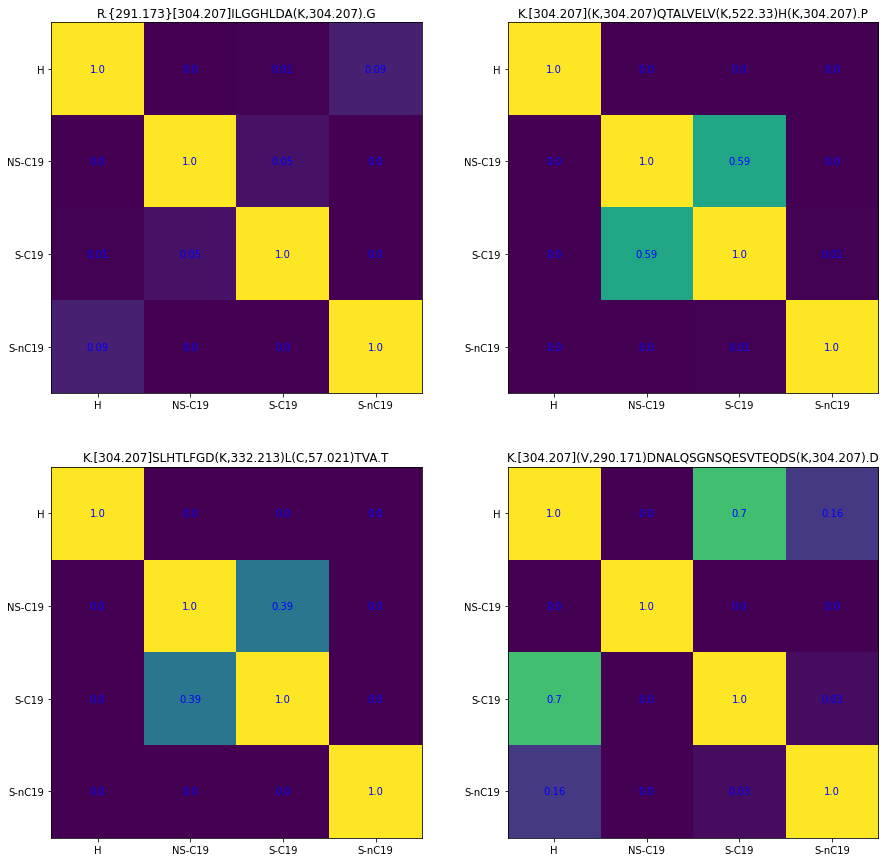

In [ ]:
annotate_cond = ['H','NS-C19','S-C19','S-nC19']
fig, axs = plt.subplots(2,2, figsize = (15,15))
counter = 0
for i in range(0,2):
  for j in range(0,2):
    im = axs[i,j].imshow(ttest[counter])
    axs[i,j].set_xticks(np.arange(len(cond)))
    axs[i,j].set_yticks(np.arange(len(cond)))
    axs[i,j].set_xticklabels(annotate_cond)
    axs[i,j].set_yticklabels(annotate_cond)
    for k in range(len(cond)):
      for l in range(len(cond)):
        text = axs[i,j].text(k,l,round(ttest[counter][k][l],2), ha = 'center', va = 'center', color = 'b')
    axs[i,j].set_title(common_features[counter])
    counter = counter + 1
plt.show()

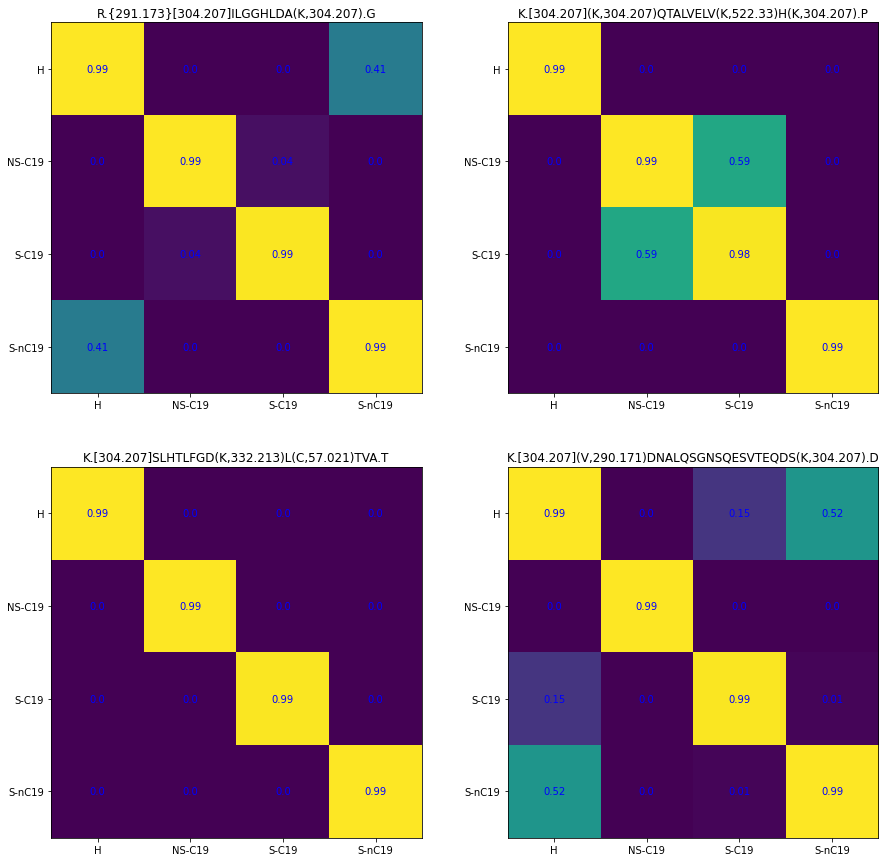

In [ ]:
annotate_cond = ['H','NS-C19','S-C19','S-nC19']
fig, axs = plt.subplots(2,2, figsize = (15,15))
counter = 0
for i in range(0,2):
  for j in range(0,2):
    im = axs[i,j].imshow(mwtest[counter])
    axs[i,j].set_xticks(np.arange(len(cond)))
    axs[i,j].set_yticks(np.arange(len(cond)))
    axs[i,j].set_xticklabels(annotate_cond)
    axs[i,j].set_yticklabels(annotate_cond)
    for k in range(len(cond)):
      for l in range(len(cond)):
        text = axs[i,j].text(k,l,round(mwtest[counter][k][l],2), ha = 'center', va = 'center', color = 'b')
    axs[i,j].set_title(common_features[counter])
    counter = counter + 1
plt.show()

### Assessment on protein-level differential abundance

In [ ]:
protein_da = list(peptide_info[peptide_info['Peptide'].isin(common_features)]['Top_canonical_protein'])
protein_da = peptide_info[peptide_info['Top_canonical_protein'].isin(protein_da)]
protein_da = protein_da.loc[protein_da['Peptide'].isin(list(x.columns))]
display(protein_da)

,Peptide,Unmodified_sequence,Charge,Top_canonical_protein,Canonical_proteins
23845,"V.[304.207]AAPSVFIFPPSDEQL(K,304.207).S",.AAPSVFIFPPSDEQLK.,3,sp|P01834|IGKC_HUMAN,sp|P01834|IGKC_HUMAN
23887,"R.[304.207]TVAAPSVFI(F,-57.054)PPSDEQL(K,304.2...",.TVAAPSVFIFPPSDEQLK.,3,sp|P01834|IGKC_HUMAN,sp|P01834|IGKC_HUMAN
23975,"K.[304.207]VYA(C,57.021)EVTHQGLSSPVT(K,246.147).S",.VYACEVTHQGLSSPVTK.,3,sp|P01834|IGKC_HUMAN,sp|P01834|IGKC_HUMAN
24181,"K.[304.207](V,290.171)DNALQSGNSQESVTEQDS(K,304...",.VDNALQSGNSQESVTEQDSK.,4,sp|P01834|IGKC_HUMAN,sp|P01834|IGKC_HUMAN
24206,"V.[200.124]AAPSVFIFPPSDEQL(K,304.207).S",.AAPSVFIFPPSDEQLK.,3,sp|P01834|IGKC_HUMAN,sp|P01834|IGKC_HUMAN
...,...,...,...,...,...
76476,"R.[304.207]RHPYFYAPE(L,-18.008).L",.RHPYFYAPEL.,3,sp|P02768|ALBU_HUMAN,sp|P02768|ALBU_HUMAN
76479,R.{200.100}[304.207]RHPYFYAPELLF.F,.RHPYFYAPELLF.,4,sp|P02768|ALBU_HUMAN,sp|P02768|ALBU_HUMAN
76483,R.[304.207]RHPYFYAPELLFF.A,.RHPYFYAPELLFF.,4,sp|P02768|ALBU_HUMAN,sp|P02768|ALBU_HUMAN
76486,"R.[304.207]RHPYFYAPELL(F,-13.144)F.A",.RHPYFYAPELLFF.,4,sp|P02768|ALBU_HUMAN,sp|P02768|ALBU_HUMAN
